# Classification with KNN and Logistic Regression

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Metriche

def TP_TN_FP_FN(y_true, y_pred):
    positive = (y_true == 1)
    negative = (y_true == 0)
    pred_positive = (y_pred == 1)
    pred_negative = (y_pred == 0)

    TP = np.sum(positive & pred_positive)
    TN = np.sum(negative & pred_negative)
    FP = np.sum(negative & pred_positive)
    FN = np.sum(positive & pred_negative)

    return TP, TN, FP, FN

def accuracy (y_true, y_pred):
    total_pred = len(y_true)
    is_correct = (y_true == y_pred)
    n_correct_pred = np.sum(is_correct)
    accuracy = n_correct_pred / total_pred

    return accuracy

def specificity(y_true, y_pred):
    TP, TN, FP, FN = TP_TN_FP_FN(y_true, y_pred)
    specifity = TN / (TN + FP)
    
    return specifity

def precision(y_true, y_pred):
    TP, TN, FP, FN = TP_TN_FP_FN(y_true, y_pred)
    precision = TP / (TP + FP)
    return precision

def recall (y_true, y_pred):
    TP, TN, FP, FN = TP_TN_FP_FN(y_true, y_pred)
    recall = TP / (TP + FN)
    
    return recall


In [14]:
true_labels = np.array(['cat', 'dog', 'cat'])
predicted_labels = np.array(['cat', 'dog', 'dog'])
acc = accuracy(true_labels, predicted_labels)
print(acc)


0.6666666666666666


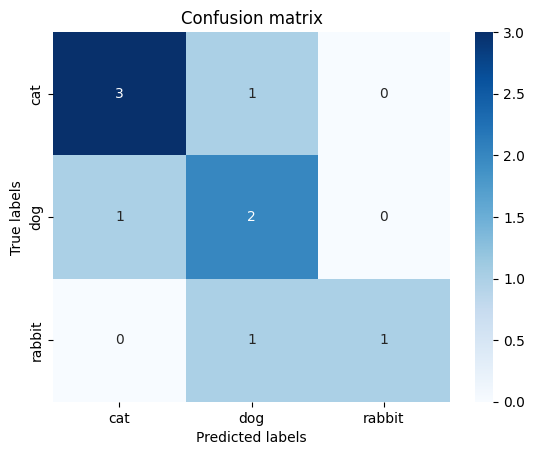

In [15]:
def get_confusion_matrix(y_true, y_pred, classes):
    """
    Args:
    y_true: array of true labels. Shape (n_samples, ) or (n_samples, 1)
    y_pred: array of predicted labels. Shape (n_samples, ) or (n_samples, 1)
    classes: list of class labels
    """
    n_classes = len(classes)
    confusion_matrix = np.zeros((n_classes, n_classes))
    for i in range(n_classes):
        for j in range(n_classes):
            confusion_matrix[i, j] = np.sum((y_true == classes[i]) & (y_pred == classes[j]))
    return confusion_matrix


classes = ['cat', 'dog', 'rabbit']
true_labels      = np.array(['cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'rabbit', 'rabbit' ])
predicted_labels = np.array(['cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'rabbit', 'dog'])

confusion_matrix = get_confusion_matrix(true_labels, predicted_labels, classes)
sns.heatmap(confusion_matrix, annot=True, xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.show()

In [16]:
# test metriche

y_true = np.array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1])
y_pred = np.array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0])
TP, TN, FP, FN = TP_TN_FP_FN(y_true, y_pred)
acc = accuracy(y_true, y_pred)
spec = specificity(y_true, y_pred)
prec = precision(y_true, y_pred)
rec = recall(y_true, y_pred)

print("True Positives: ", TP, " True Negatives: ", TN, " False Positives: ", FP, " False Negatives: ", FN)
print("Accuracy: ", acc)
print("Specificity: ", spec)
print("Precision: ", prec)
print("Recall: ", rec)

True Positives:  4  True Negatives:  2  False Positives:  1  False Negatives:  3
Accuracy:  0.6
Specificity:  0.6666666666666666
Precision:  0.8
Recall:  0.5714285714285714


# Stratified Spliting